In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/cars_24_dataset.csv')

In [3]:
#1.Displays the first 5 rows to quickly check column names and initial data types
df.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [4]:
#2. Shows the last 5 rows to ensure data wasn't cut off or corrupted at the end.
df.tail()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
8010,8010,Datsun Redi Go,2018.0,11500,1,PETROL,MH-01,Manual,HatchBack,292000
8011,8011,Toyota YARIS,2018.0,73393,2,PETROL,KA-03,Manual,Sedan,534000
8012,8012,Volkswagen Ameo,2016.0,83810,2,PETROL,UP-78,Manual,Sedan,424000
8013,8013,Hyundai GRAND I10 NIOS,2019.0,39162,1,PETROL,CH-01,Automatic,HatchBack,685000
8014,8014,Tata TIGOR,2022.0,82009,2,PETROL,MH-02,Manual,Sedan,392000


In [5]:
#3. Generates statistical summaries (mean, min, max, std) for numerical columns.
df.describe()

,Unnamed: 0,Year,Distance,Owner,Price
count,8015.000000,8014.000000,8015.000000,8015.000000,8.015000e+03
mean,4007.000000,2016.995009,52621.411728,1.300187,5.748829e+05
std,2313.875537,2.861454,29182.922728,0.510893,2.651049e+05
min,0.000000,2010.000000,0.000000,1.000000,1.190000e+05
25%,2003.500000,2015.000000,30730.000000,1.000000,3.930000e+05
50%,4007.000000,2017.000000,50359.000000,1.000000,5.350000e+05
75%,6010.500000,2019.000000,71762.000000,2.000000,6.980000e+05
max,8014.000000,2023.000000,971212.000000,4.000000,3.300000e+06


In [6]:
#4
df.isnull().sum()

,0
Unnamed: 0,0
Car Name,1
Year,1
Distance,0
Owner,0
Fuel,0
Location,213
Drive,0
Type,0
Price,0


In [7]:
#4 number of rows and columns
df.shape

(8015, 10)

Text(0, 0.5, 'Number of cars')

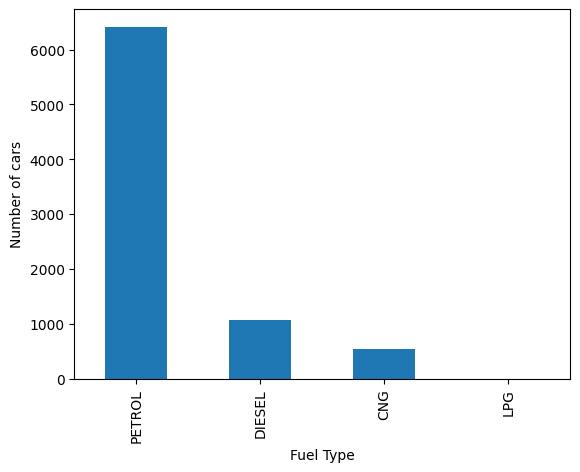

In [8]:
#5 Which fuel types are most prevalent in the used car market?
df['Fuel'].value_counts().plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Number of cars')

#Answer: Petrol is the overwhelmingly dominant fuel type in the dataset.

In [9]:
#6. What is the count of each fuel type?

df['Fuel'].value_counts()

#Petrol cars are the most common
#Followed by Diesel, with fewer CNG/Electric*/

,count
Fuel,
PETROL,6413
DIESEL,1066
CNG,535
LPG,1


Text(0, 0.5, 'Number of Cars')

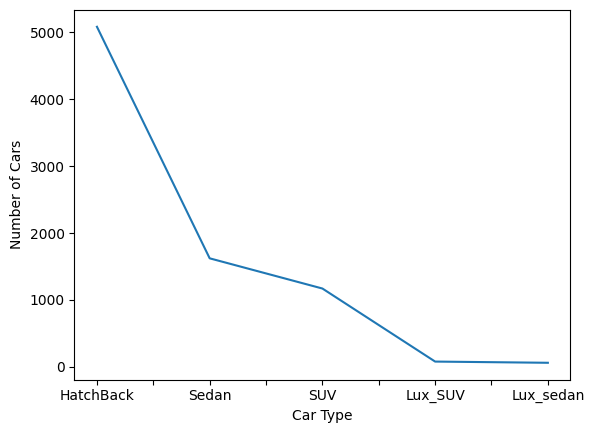

In [10]:
#Univariate Analysis
#7.What is the volume and ranking of various car types
df['Type'].value_counts().plot(kind='line')
plt.xlabel('Car Type')
plt.ylabel('Number of Cars')

#This plot ranks car types (like SUV, Hatchback, Sedan) by their requency.

<Axes: ylabel='count'>

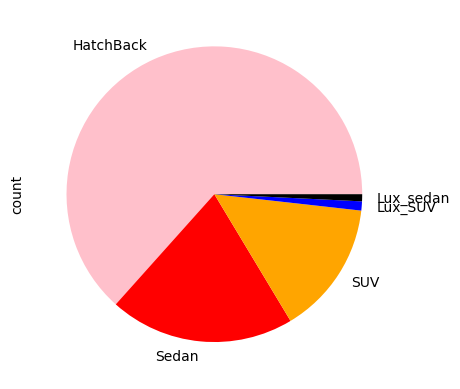

In [11]:
#8. What is the percentage distribution (market share) of different car types in the dataset?
df['Type'].value_counts().plot(kind='pie',colors=['pink','red','orange','blue','Black'])

#shows which category  makes up the "biggest slice" of the total inventory.

In [12]:
#9.What is the average car price by fuel type?
df.groupby('Fuel')['Price'].mean()

,Price
Fuel,
CNG,506422.336449
DIESEL,771751.360225
LPG,317000.000000
PETROL,547909.901762


In [13]:
#10. Which transmission type is more common?
df['Drive'].value_counts()

#Manual cars dominate the dataset


,count
Drive,
Manual,6455
Automatic,1560


In [14]:
#11.What is the count of cars by type and transmission?
df.groupby(['Type', 'Drive']).size()

#Hatchbacks with manual transmission are the most common combination.

Type       Drive    
HatchBack  Automatic     722
           Manual       4358
Lux_SUV    Automatic      35
           Manual         45
Lux_sedan  Automatic      38
           Manual         24
SUV        Automatic     317
           Manual        854
Sedan      Automatic     448
           Manual       1174
dtype: int64

Text(0.5, 1.0, 'Distance vs Price')

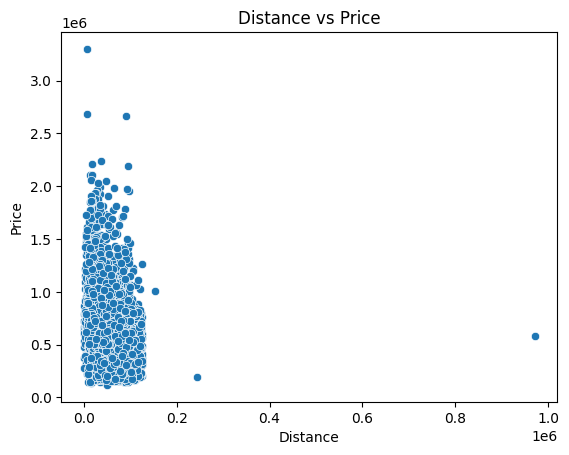

In [15]:
#12. Does car price decrease as distance increases?
sns.scatterplot(x=df['Distance'], y=df['Price'])
plt.title("Distance vs Price")

#Cars with higher distance driven generally have lower prices
#Shows a negative relationship

<Axes: xlabel='Type', ylabel='Price'>

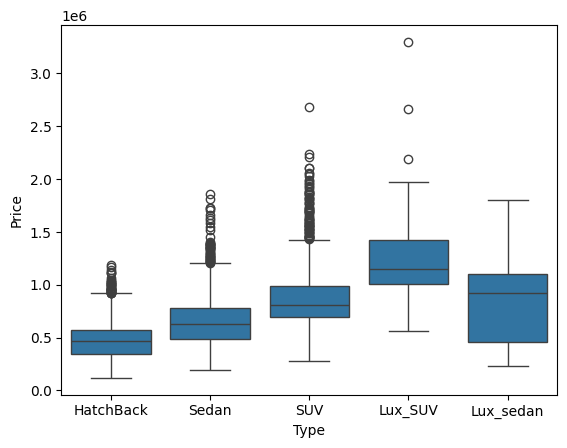

In [16]:
# Type of Analysis: Bivariate Analysis
#13. Are there outliers in car prices?
sns.boxplot(x=df['Type'],y=df['Price'])

#outliers—these are cars priced much higher than normal for that specific type.
#Hatchbacks have the smallest boxes, meaning prices are consistent and predictable

<Axes: xlabel='Distance', ylabel='Price'>

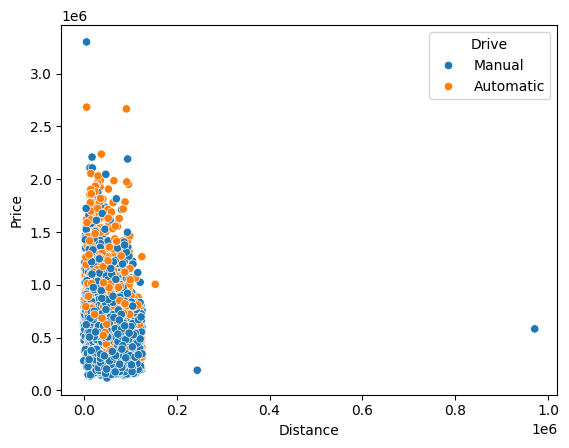

In [17]:
#Multivariate Analysis
#14.Do automatic cars cost more than manual cars for similar distance range?
sns.scatterplot(x=df['Distance'], y=df['Price'], hue=df['Drive'])

#Automatic cars are generally priced higher than manual cars for similar distance ranges.



Text(0.5, 1.0, 'Car Age vs. Price (Categorized by Car Type)')

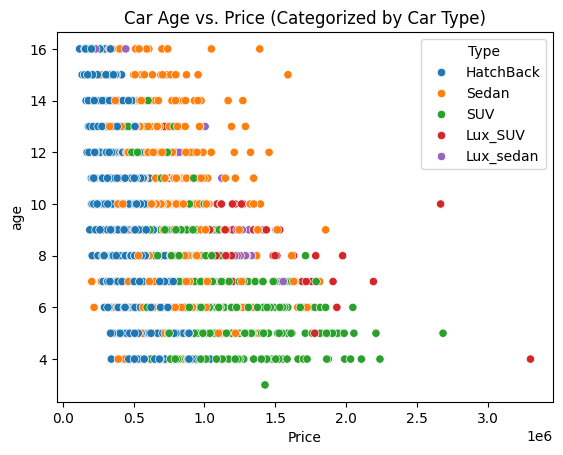

In [18]:
#Multivariate Analysis
#15.Analyze the impact of a car's age on its resale value
current_year=2026
df['age'] = current_year - df['Year']
sns.scatterplot(x=df['Price'], y=df['age'], hue=df['Type'])
plt.title('Car Age vs. Price (Categorized by Car Type)')

#Newer cars generally have higher prices, indicating that price increases with manufacturing year.

/tmp/ipython-input-1799703555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],color='green')


Text(0.5, 1.0, 'Distribution of Car Prices')

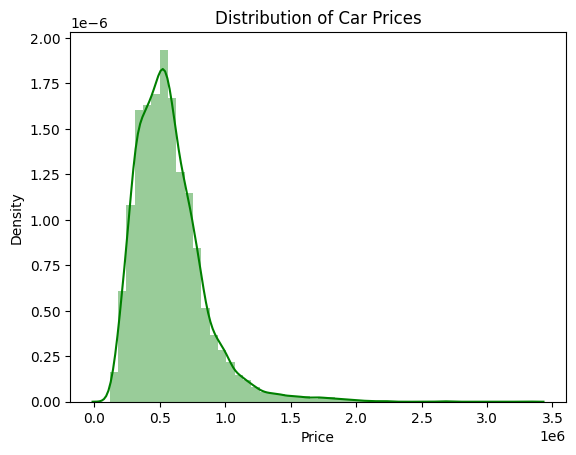

In [ ]:
#Univariate Analysis
#16.What is the distribution of car prices in the dataset?
sns.distplot(df['Price'],color='green')
plt.title("Distribution of Car Prices")

#The car prices are right-skewed, with most cars concentrated in the lower to mid-price range

Text(0.5, 1.0, 'Car Price Depreciation over Years')

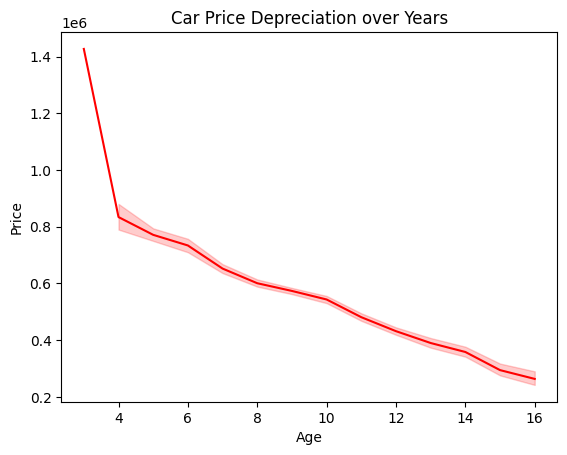

In [ ]:
# Type of Analysis: Bivariate Analysis
#17. How does a car's value drop as it gets older
current_year=2026
df['Age'] = current_year - df['Year']
sns.lineplot(x=df['Age'], y=df['Price'], color='red')
plt.title('Car Price Depreciation over Years')

# Generally, as the age increases, the price decreases

Text(0, 0.5, 'Price ')

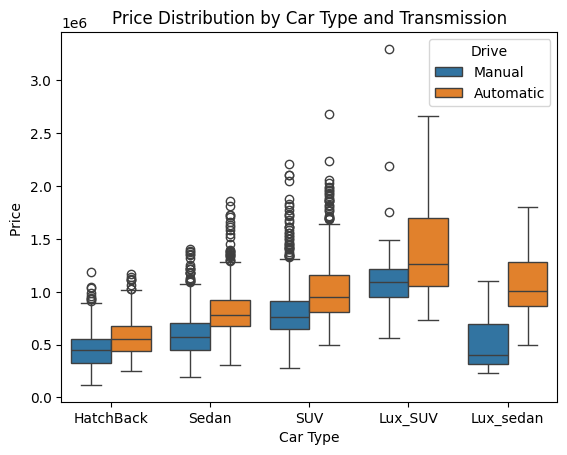

In [ ]:
#Type of Analysis: Multivariate Analysis
#18.How manual vs automatic affects price within each type

sns.boxplot(data=df, x='Type', y='Price', hue='Drive')
plt.title('Price Distribution by Car Type and Transmission')
plt.xlabel('Car Type')
plt.ylabel('Price ')

#shows that "Automatic" versions are generally higher in price than "Manual" .

Text(0.5, 1.0, 'Drive vs Fuel Type')

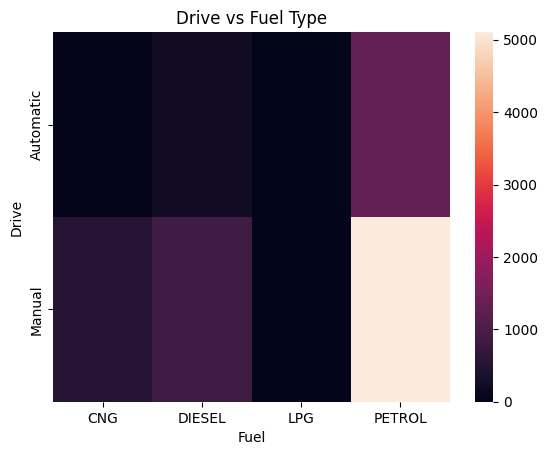

In [ ]:
#Bivariate Analysis
#19.Which combination of Drive and Fuel is the most common in the used car market?
sns.heatmap(pd.crosstab(df['Drive'], df['Fuel']))
plt.title("Drive vs Fuel Type")

#Manual-Petrol dominance
# Automatic-Petrol-> mid-rang
#Manual-Diesel ->mid-range
# CNG/LPG ->rare

This plot shows the frequency distribution of car distances. As you can see, it focuses on one variable. If you want to see the relationship between 'Distance' and 'Price' along with 'Fuel' and 'Age', the `scatterplot` as provided previously is the correct approach.